**Importing Modules**

In [1]:
import autogen as ag
import pandas as pd
from IPython.core.getipython import get_ipython
from typing import Dict, List, Optional, Union, Tuple
import matplotlib.pyplot as plt
from pydantic.dataclasses import dataclass
from typing import Annotated, Any

try:
    from termcolor import colored
except ImportError:

    def colored(x, *args, **kwargs):
        return x

import base64
import requests
from typing import Literal
from pydantic import BaseModel, Field
from typing_extensions import Annotated


# OpenAI API Key
api_key = ""
ipython = get_ipython()

**Defining Custom User Proxy Agent Class**

In [2]:
class IPythonUserProxyAgent(ag.UserProxyAgent):
    def __init__(self, name: str, **kwargs):
        super().__init__(name, **kwargs)
        self._ipython = get_ipython()

    def generate_init_message(self, *args, **kwargs) -> Union[str, Dict]:
        return (
            super().generate_init_message(*args, **kwargs)
            + """"""
        )


    def provide_the_log_summary(self,s):
        prompt = "You are given logs in {} brackets. Your task is to "
    def clean_logs(self,ls):
        ls_split = ls.split("\n")  # Split the input string into a list of lines
        cleaned_lines = []  # Initialize an empty list to hold the cleaned lines
    
        remove_phrases = ['Requirement already satisfied',
                          "---------------------------------------- ","Downloading","----"]  # List of phrases that indicate a line should be removed
    
        for line in ls_split:
            line = line.strip()

            inc = 1
            for rp in remove_phrases:

                if rp in line:
                    inc = 0
                    break

            if inc==1:
                cleaned_lines.append(line)
    
        cleaned_log = "\n".join(cleaned_lines)  # Join the cleaned lines back into a single string with newlines
        cleaned_log = cleaned_log.strip()
        return cleaned_log
                    
    def run_code_my_version(self,code):
        print("%%%%%%% running my version %%%%%%%%%%")
        import sys
        from io import StringIO
        oldOO = sys.stdout
        myOO = StringIO()
        sys.stdout = myOO
        get_v_i = myOO.getvalue()
        ret = self._ipython.run_cell(code)
        get_v_f = myOO.getvalue()
        sys.stdout = oldOO
        v_f_trim = get_v_f[len(get_v_i):]
        err = str(ret.error_in_exec)
        exit_code = 0
        if err in ["none","None","NONE",""]:
            pass
        else:
            v_f_trim = err + "\n"+ v_f_trim 
            exit_code=1
       # if len(self.Out.keys())==0:
         #   lst_op = ""
      #  else:
      #      lst_op = self.Out[max(self.Out.keys())]
     #   lst_ip = self.In[-1]
        lst_ip=""
        lst_op = ""
        
        return v_f_trim, lst_op, lst_ip,exit_code

    def create_and_execute_code_cell(self,code):
        self.insert_and_execute_code_cell(code)
        o1,o2,i1,exit_code = self.run_code_my_version(code)
        o3 = str(o1)
        #+"\n"+str(o2)
    
        return o3,exit_code
    
    def insert_and_execute_code_cell(self,code):
     #   ipython = get_ipython()
        pass
       #  self._ipython.set_next_input(code)
     #   ipython.run_cell(code)
    
    def run_code(self, code, **kwargs):
        print("def run_code start")
      #  print("code is ----->"+str(code)+"<--------")
        
        ec,exit_code = self.create_and_execute_code_cell(code)
  #      print(ec)
        ec = self.clean_logs(ec)
        print("####################")
      #  print(ec)
       # print("ec is ---->"+str(ec)+"<-----------------")
        return exit_code,ec,None


    def execute_code_blocks(self,code_blocks):
       # print("type of code blocks is "+str(type(code_blocks)))
     #   print("content of code blocks is " + str(code_blocks))
        """Execute the code blocks and return the result."""
        logs_all = ""
        for i, code_block in enumerate(code_blocks):
            lang, code = code_block

            if not lang:
                lang = infer_lang(code)

            print("inferred lang is "+str(lang))

            lang = "python"
            print(
                colored(
                    f"\n>>>>>>>> EXECUTING CODE BLOCK {i} (inferred language is {lang})...",
                    "red",
                ),
                flush=True,
            )




           # if lang in ["bash","shell","sh"]:



            if lang in ["bash", "shell", "sh"]:
               # print("shell command detected")
                code  = "!"+code
                exitcode, logs, image = self.run_code(code, lang=lang, **self._code_execution_config)
                #print(" exitcode, logs, image ")
              #  print("exitcode is "+str(exitcode))
             #   print("logs is "+str(logs))
              #  print("image is "+str(image))
            elif lang in ["python", "Python"]:
                if code.startswith("# filename: "):
                    filename = code[11 : code.find("\n")].strip()
                else:
                    filename = None
                exitcode, logs, image = self.run_code(
                    code,
                    lang="python",
                    filename=filename,
                    **self._code_execution_config,
                )
           #     print(" exitcode, logs, image ")
               # print("exitcode is "+str(exitcode))
              #  print("logs is "+str(logs))
             #   print("image is "+str(image))
            else:
                # In case the language is not supported, we return an error message.
                exitcode, logs, image = (
                    1,
                    f"unknown language {lang}",
                    None,
                )
                # raise NotImplementedError
            if image is not None:
                self._code_execution_config["use_docker"] = image
            logs_all += "\n" + str(logs)
            logs_all = str(logs_all)

       #     print("exitcode is --->"+str(exitcode)+"<------")
         #   print("logs_all is ----->"+str(logs_all)+"<----------")
            if exitcode != 0:
                return exitcode, logs_all


        return exitcode, logs_all
   # def run_code(self, code, **kwargs):
    #    print("start of run code")
     #   result = self._ipython.run_cell("%%capture --no-display cap\n" + code)
      #  log = self._ipython.ev("cap.stdout")
       # log += self._ipython.ev("cap.stderr")
       # if result.result is not None:
       #     log += str(result.result)
       # exitcode = 0 if result.success else 1
       # if result.error_before_exec is not None:
       #     log += f"\n{result.error_before_exec}"
       #     exitcode = 1
       ## if result.error_in_exec is not None:
         #   log += f"\n{result.error_in_exec}"
         #   exitcode = 1

        print("log -->"+str(log)+"<-----")
        print("exit code is "+str(exitcode))
        print("end of run code")
        return exitcode, log, None

**Designing Prompt**

In [3]:
msg2 = """Read data from F:/office_work/code_interpreter/loan_approval_data.csv
Read and print the metadata from F:/office_work/code_interpreter/metadata.txt
Before starting first provide an outline of all the major steps involved in the modelling process from data preprocessing to model evaluation.
Perform one step at a time. Please remember to convert Loan_Staus to numerical column by mapping 'Y' to 1 and 'N' to 0"""

In [4]:
print(msg2)

Read data from F:/office_work/code_interpreter/loan_approval_data.csv
Read and print the metadata from F:/office_work/code_interpreter/metadata.txt
Before starting first provide an outline of all the major steps involved in the modelling process from data preprocessing to model evaluation.
Perform one step at a time. Please remember to convert Loan_Staus to numerical column by mapping 'Y' to 1 and 'N' to 0




**Specify config list for LLMs**

In [5]:
config_list = [
    {
        "model": "gpt-4",
        "api_key": api_key
    }
]

llm_config={
"config_list": config_list,
"temperature": 0,
    "seed":40
}

**Defining RnP plot function and GPT4 vision api**

In [6]:

def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')
      
def rnp_10_old(df,column,def1):
    df1=df.copy()
    df1["bins"]=pd.cut(df1[column],duplicates="drop",include_lowest="true",bins=((df1[column].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])).tolist())).values.add_categories('missing')
    df1["bins"]=df1["bins"].fillna("missing")

    c= (df1.groupby(["bins"],dropna=False).agg(var_count=(def1,"count"), default_rate=(def1,"mean"))).reset_index()
    c['var_name'] = column
    return c[['var_name',"bins",'var_count','default_rate']]

def plot_graph(rnp_df,c):
    x = rnp_df['bins'].astype(str)
    y = rnp_df['default_rate']
    
    plt.plot(x, y) 
    

    file_pth = "temp/rnp_plot_for_column_"+c+".jpg"
    plt.savefig(file_pth)
    plt.show()
    return file_pth
def interact_with_image(image_path:Annotated[str,'full path of image'],
                        query:Annotated[str,'question that user needs to ask from the image'])->str:

    # Getting the base64 string
    base64_image = encode_image(image_path)
    
    headers = {
      "Content-Type": "application/json",
      "Authorization": f"Bearer {api_key}"
    }
    
    payload = {
      "model": "gpt-4-vision-preview",
      "messages": [
        {
          "role": "user",
          "content": [
            {
              "type": "text",
              "text":query
            },
            {
              "type": "image_url",
              "image_url": {
                "url": f"data:image/jpeg;base64,{base64_image}"
              }
            }
          ]
        }
      ],
      "max_tokens": 300
    }
    
    response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload)
    res = response.json()['choices'][0]['message']['content']
    return res


def plot_rnp_graphs(y:Annotated[str,"dependent variable"],dataframe_name:Annotated[str,'name of the dataframe in string']
                   ,inc_l:Annotated[List[str],'list of columns for which RnP Plots are required'] )->List[str]:
    data =  globals()[dataframe_name]

    data[y] = data[y].astype(float)
    cols = inc_l
    
    print("running get_rnp_data")      
    rnp_df = pd.DataFrame()

    file_paths = []
    for a in cols:
            print("calculating rnp for "+str(a))
            header_list = {a:[]}
            header_df = pd.DataFrame(header_list)
            temp_list1=[data[a].count(),data[a].isna().sum()]
            temp_list2=(data[a].quantile([0,0.01,0.1,0.25,0.5,0.75,0.90,0.99,1])).to_list()
            temp_df=pd.DataFrame([[a]+temp_list1+temp_list2], columns = ['var_name','N',
                                                                         'N miss','min','P1','P10','P25',
                                                                         'P50','P75','P90','P99','max'])
     
         #   print("$$$$$$$$$$$$$$$$$$$$$")
            temp_df_rnp = rnp_10_old(data,a,y)
            rnp_df = pd.concat([rnp_df,temp_df_rnp])

            file_path = plot_graph(temp_df_rnp,a)
            file_paths.append(file_path)
            print("###################################################################################")
    return file_paths

**Creating assistant and user proxy agents**

In [8]:
assistant = ag.AssistantAgent(name = "assistant",
    system_message="You are helpful assistant. You are a Machine Learning expert. You analyse the data and write python codes. You store all the images or plots generated in path = 'F:/office_work/code_interpreter/temp'. You write only one python code block at a time. Make sure when using tools do not write like functions.tool_name. If some pip install is required mention it in python code block itself. To install python dependencies like module1 , module2 and module3 write like !pip install module1 moduke2 module3 . If you want to write df.head() write print(df.head) instead."
                                           ,llm_config=llm_config)


user_proxy = IPythonUserProxyAgent( name = "user_proxy", 
    system_message="Your act as the user. Your task is to get work done. Please ensure you return the desired output. Do not return a blank output.",
                            code_execution_config={"work_dir": "coding", 
                                                   "use_docker": False,
                                                    },
                               max_consecutive_auto_reply=100,
                           human_input_mode="ALWAYS",llm_config=llm_config)
#ALWAYS or NEVER

**Registering functions with agents**

In [9]:
ag.agentchat.register_function(
    interact_with_image,
    caller=assistant,
    executor=user_proxy,
    name="interact_with_image",
    description="Use this tool to read the image and provide insights.",
)

ag.agentchat.register_function(
     plot_rnp_graphs,
    caller=assistant,
    executor=user_proxy,
    name="plot_rnp_graphs",
    description="Use this tool to plot RnP plots (also known as ranks and plots)",
)

**Initiating Chat**

user_proxy (to assistant):

Read data from F:/office_work/code_interpreter/loan_approval_data.csv
Read and print the metadata from F:/office_work/code_interpreter/metadata.txt
Before starting first provide an outline of all the major steps involved in the modelling process from data preprocessing to model evaluation.
Perform one step at a time. Please remember to convert Loan_Staus to numerical column by mapping 'Y' to 1 and 'N' to 0



--------------------------------------------------------------------------------
assistant (to user_proxy):

Sure, let's start by reading the data from the CSV file and the metadata from the text file. We will use pandas, a powerful data manipulation library in Python. If pandas is not installed, you can install it using pip.

```python
!pip install pandas

import pandas as pd

# Read the data from the CSV file
df = pd.read_csv('F:/office_work/code_interpreter/loan_approval_data.csv')
print(df.head())

# Read the metadata from the text file
with open('F

C:\Users\amrit\AppData\Local\Temp\ipykernel_14508\4054804565.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)
C:\Users\amrit\AppData\Local\Temp\ipykernel_14508\4054804565.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

assistant (to user_proxy):

Great! We have successfully handled the missing values. Now, all the columns have zero missing values.

Next, we can proceed to the Exploratory Data Analysis (EDA) stage. In this stage, we will try to understand the data, find patterns, relationships, or outliers in the data. We can use various statistical and visualization techniques for this.

Let's start by getting some descriptive statistics of the numerical columns.

```python
# Get descriptive statistics of numerical columns
numerical_descriptive_stats = df.describe()
print(numerical_descriptive_stats)
```

We can also generate some plots to visualize the data. For example, we can use histograms to see the distribution of the numerical variables, and bar plots to see the frequency of categorical variables. We can also use box plots to detect any outliers in the data. 

For generating plots, we will use matplotlib and seaborn libraries. If they are not installed, you can install them using pip.

```pyth

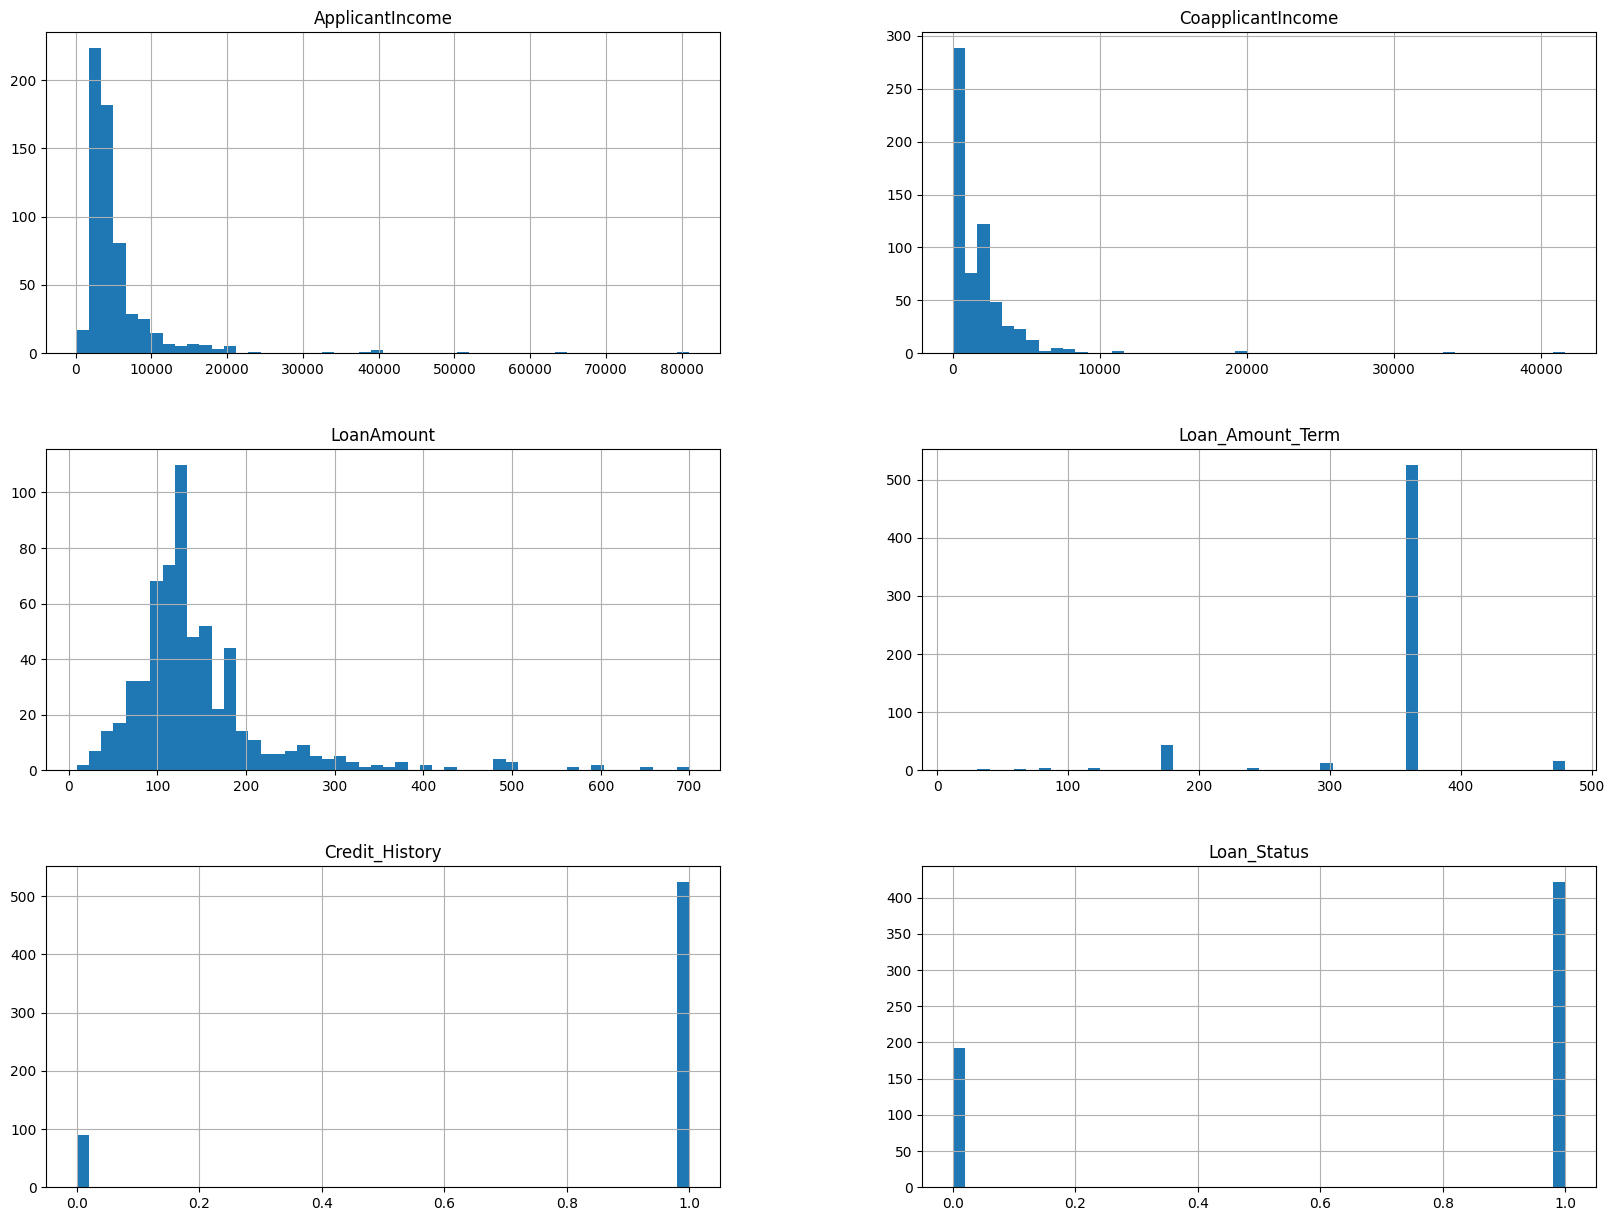

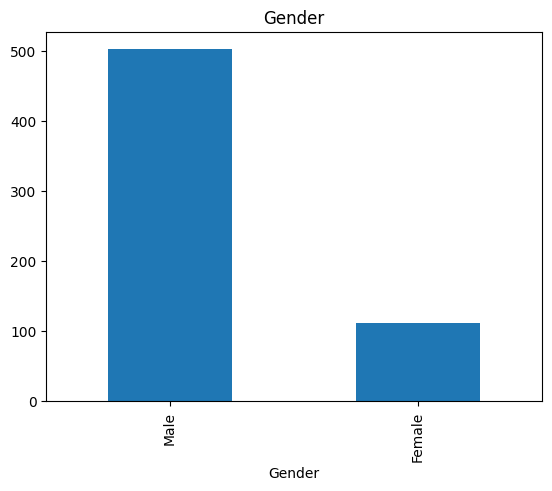

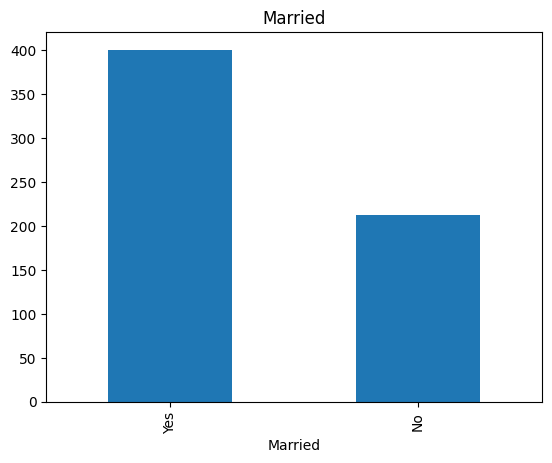

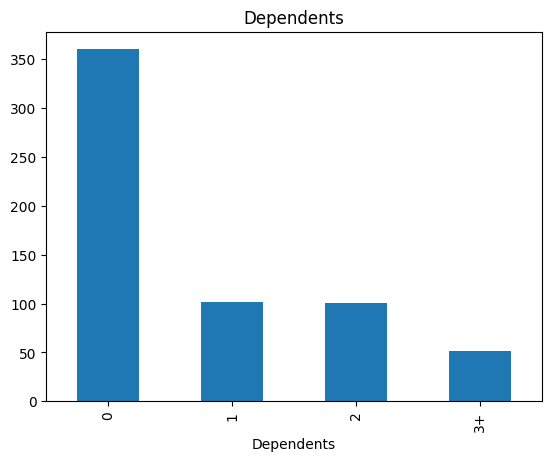

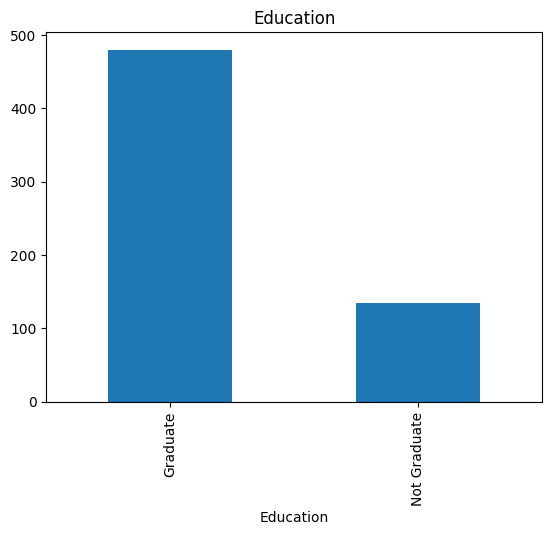

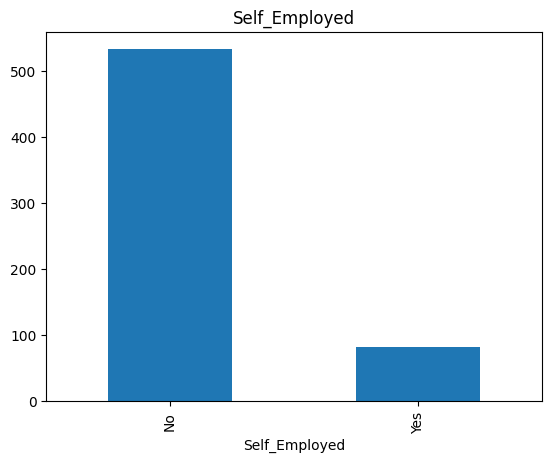

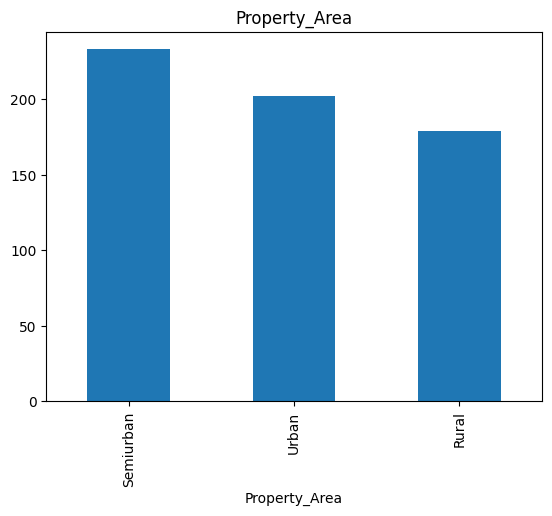

####################
user_proxy (to assistant):

exitcode: 0 (execution succeeded)
Code output: 
ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  614.000000        614.000000
mean       5403.459283        1621.245798  145.752443        342.410423
std        6109.041673        2926.248369   84.107233         64.428629
min         150.000000           0.000000    9.000000         12.000000
25%        2877.500000           0.000000  100.250000        360.000000
50%        3812.500000        1188.500000  128.000000        360.000000
75%        5795.000000        2297.250000  164.750000        360.000000
max       81000.000000       41667.000000  700.000000        480.000000

Credit_History  Loan_Status
count      614.000000   614.000000
mean         0.855049     0.687296
std          0.352339     0.463973
min          0.000000     0.000000
25%          1.000000     0.000000
50%          1.000000     1.000000
75%          1.00000

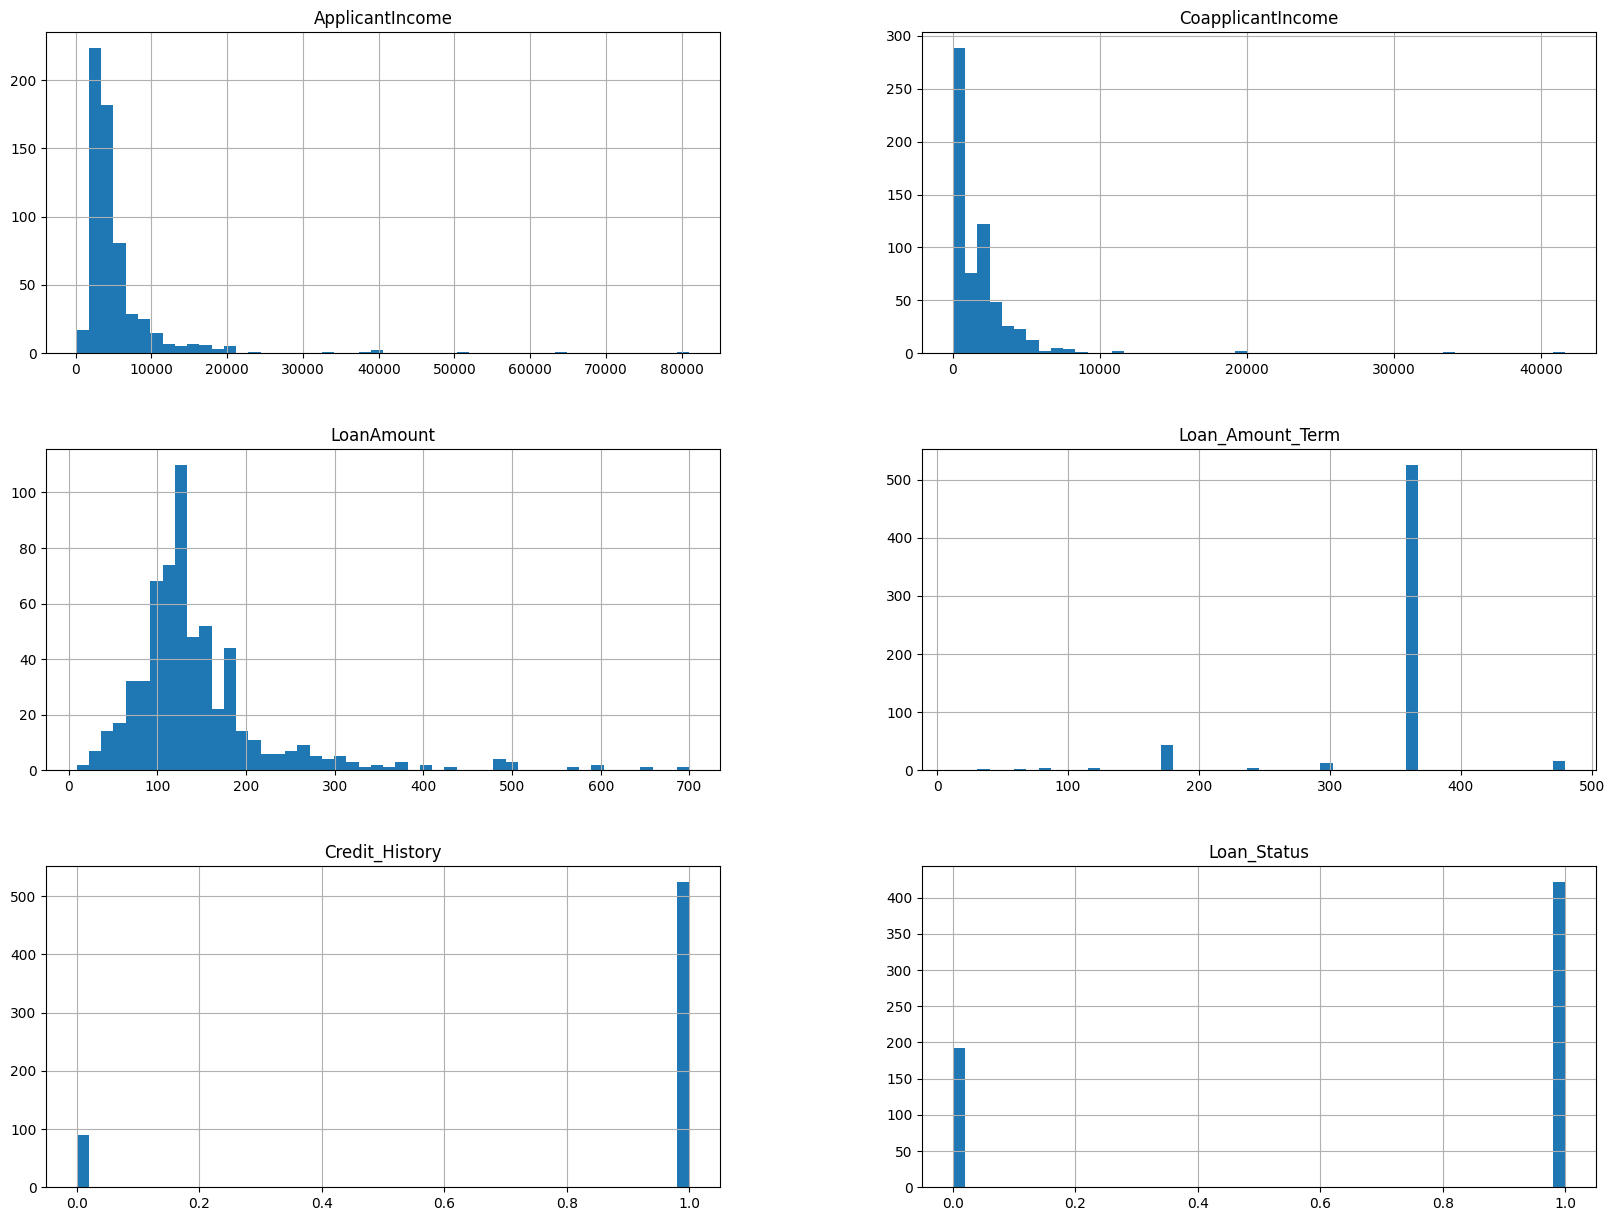

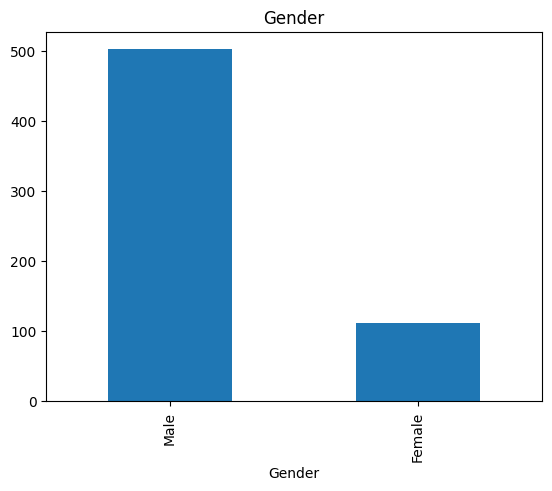

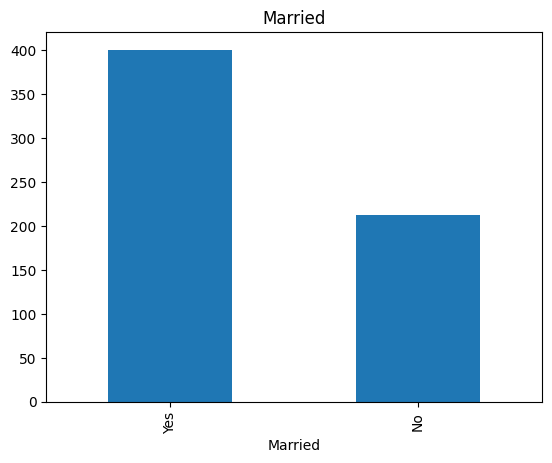

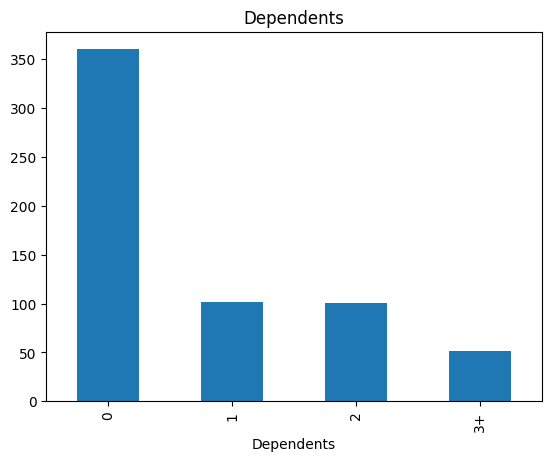

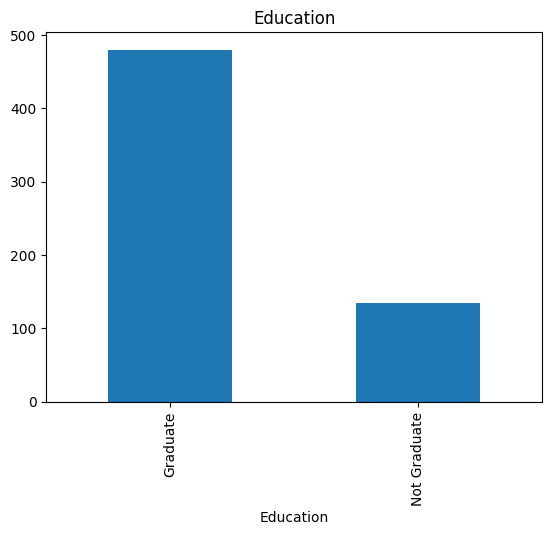

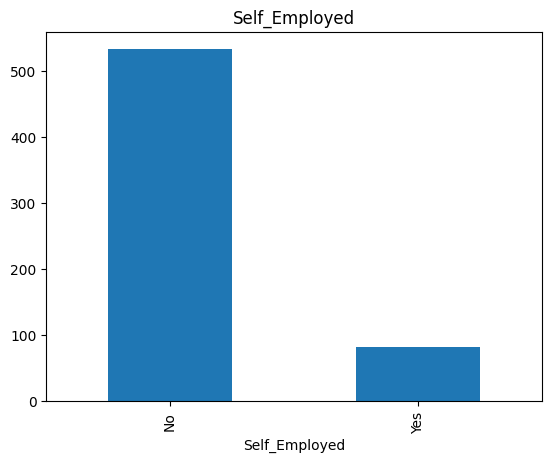

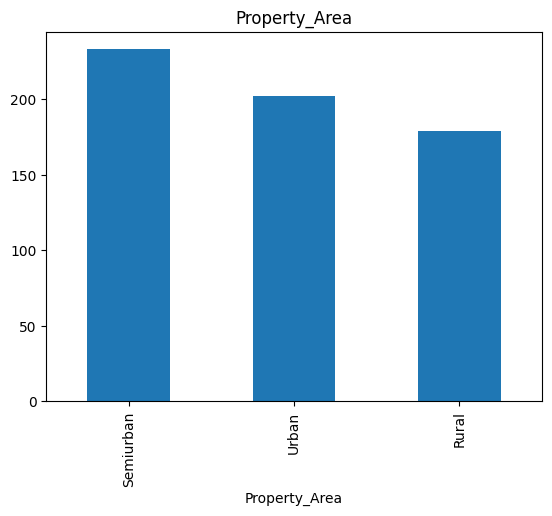

####################
user_proxy (to assistant):

exitcode: 0 (execution succeeded)
Code output: 


--------------------------------------------------------------------------------
assistant (to user_proxy):

Great! The histograms and bar plots provide a visual representation of the distribution of the data. 

From the histograms, we can observe the distribution of numerical variables. For example, we can see if the distribution is symmetric (normal distribution), skewed (either to the right or left), or has outliers.

From the bar plots, we can observe the frequency of categorical variables. For example, we can see which category has the highest frequency.

Next, we can also generate some box plots to detect any outliers in the data. 

```python
# Plot box plots of numerical columns
for column in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']:
    df.boxplot(column=column)
    plt.title(column)
    plt.show()
```

After the EDA, we can move

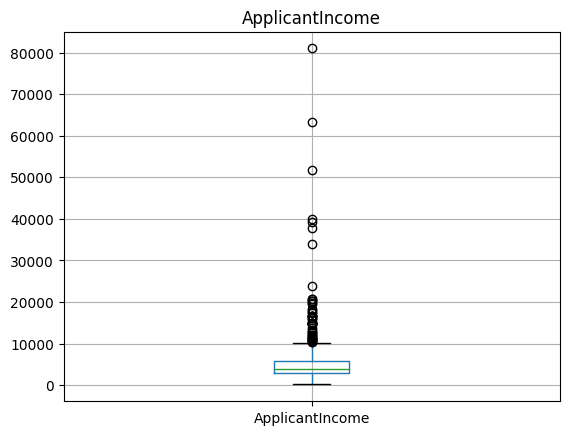

def run_code start
%%%%%%% running my version %%%%%%%%%%


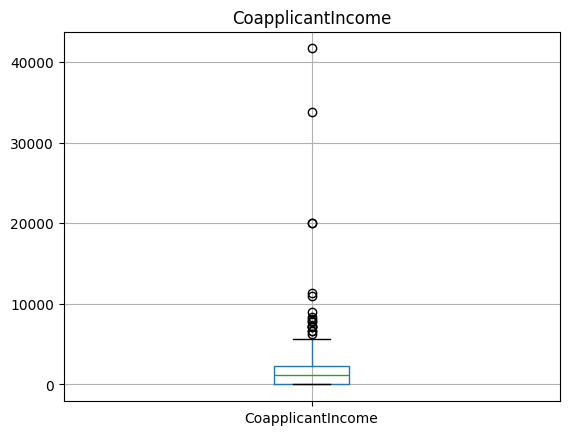

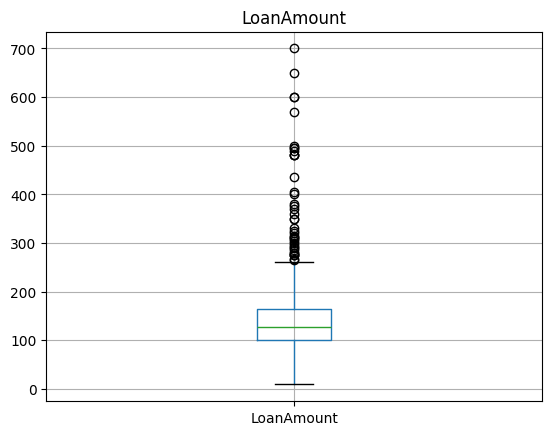

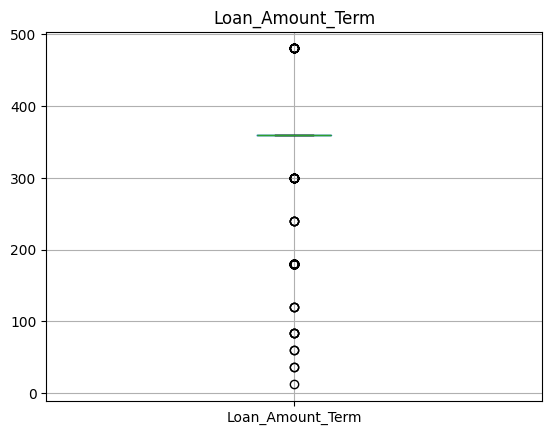

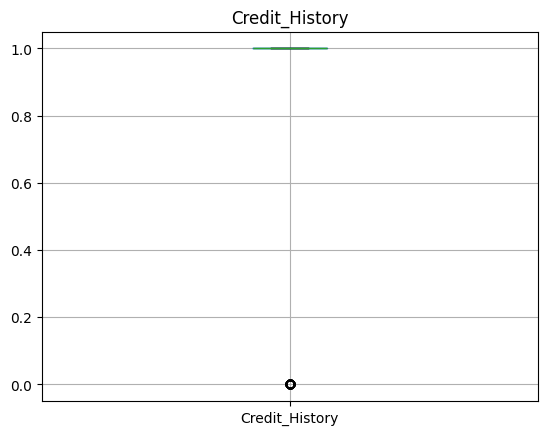

####################
user_proxy (to assistant):

exitcode: 0 (execution succeeded)
Code output: 


--------------------------------------------------------------------------------
assistant (to user_proxy):

The box plots provide a visual representation of the distribution of the data, showing properties such as the minimum, first quartile, median, third quartile, and maximum. Outliers (if any) are displayed as individual points that are in excess of 1.5 times the interquartile range above the third quartile or below the first quartile.

Next, we move on to the Feature Engineering step. In this step, we can create new features from the existing ones which might help in improving the model's performance. For example, we can create a new feature 'TotalIncome' by adding 'ApplicantIncome' and 'CoapplicantIncome'. 

```python
# Create new feature 'TotalIncome'
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
print(df.head())
```

After creating new features, we can also p

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

####################
user_proxy (to assistant):

exitcode: 1 (execution failed)
Code output: 
(491, 628) (123, 628) (491,) (123,)
Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

--------------------------------------------------------------------------------
assistant (to user_proxy):

It seems like there is an issue with the target variable 'Loan_Status'. The error message suggests that the target variable is continuous, but since 'Loan_Status' is a binary variable (either 0 or 1), it should be treated as a classification problem, not a regression problem.

This issue might have occurred during the feature scaling step. The 'Loan_Status' column should not have been included in the feature scaling because it is the target variable and it is already in the binary form (0 or 1).

Let's correct this by excluding the 'Loan_Status' column during feature scaling and then proceed with the 

C:\Users\amrit\.conda\envs\agentEnv1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\amrit\.conda\envs\agentEnv1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\amrit\.conda\envs\agentEnv1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\amrit\.conda\envs\agentEnv1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\amrit\.conda\envs\agentEnv1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\amrit\.conda\envs\agentEnv1\lib\site-pack

####################
user_proxy (to assistant):

exitcode: 0 (execution succeeded)
Code output: 


--------------------------------------------------------------------------------



KeyboardInterrupt



In [ ]:
from autogen.cache import Cache
with Cache.disk() as cache:
    # start the conversation
    user_proxy.initiate_chat(
        assistant ,
        message=msg2,
        cache=cache,
    )